 <h1 align="center">Find a car Park</h1>

 <h3 align="center">Authors: Noa Aizer & Ido Shapira & Shay Leyzerovich</h3>   

In this project we propose to develop a model for identifying whether there is free space in theparking lot image, or whether the parking is full.

# Report:

In this project we have classification problem. We wish to recognize whether the parking spot is full or free in an image. Our data set contains a huge amount of parking spots images. Therefore our features will be the images pixels and the label divided to free and full.

Preprocessing: Preparing Data- in order to use the data we needed to make some adjustments. 

- In the first stage we imported the data , the data was too big and cause hardware and memory problems- there was too many pictures and all of them with high quality.
    Thus we resized the pictures and took some samples from the data instead of all of it. 

- In the next stage we did label encoding 1 for free , 0 for full.

- We normalize all the data in order to clean noize from the images.

- In addition, we defined a random seed in order to compare between the models we built. 

- After that , we divide the set into two parts: 75% for training and 25% for testing.

- When we saw that we have a balancing problem- much more full parking spots than free. so we need to take it in account while splitting the data in order to have enough images with free parking spots in the training set but also to have some in the testing.

Building the logistic regression model:
At first, we build a basic model for our problem and check the results.

- The building details are detailed during the code.

- We improved the model by changing the function to sigmoid instead of the function we saw in class. 

- In order to avoid an overfitting problem we reduce the number of iteration.

More details:
Is during the code.

## Code & Explanations:

### Import all the necessary libraries:
We have used Python libraries:
- tensorflow v1
- sklearn

In [1]:
import tensorflow.compat.v1 as tf
# import tensorflow as tf
import cv2
import os
from tqdm import tqdm
import numpy as np
import random as rn

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn import metrics


import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### fix random seed:

In [2]:
np.random.seed(42)
rn.seed(42)
tf.set_random_seed(42)

### import the data:

In [3]:
X = []
Z = []
IMG_SIZE=150
DATASET_SIZE_FREE = 150
DATASET_SIZE_FULL = 300
FREE_DIR='C:/Users/USER/Desktop/Ariel University/שנה ג סמסטר א/למידה עמוקה ועיבוד שפות טבעיות/project/data/Free'
FULL_DIR='C:/Users/USER/Desktop/Ariel University/שנה ג סמסטר א/למידה עמוקה ועיבוד שפות טבעיות/project/data/Full'

In [4]:
def make_train_data(label,DIR, number_of_images):
    i = 1
    for img in tqdm(os.listdir(DIR)):
        path = os.path.join(DIR,img)
        img = plt.imread(path)
#         img = cv2.imread(path)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        np_img=np.asarray(img)
        X.append(np_img)
        Z.append(str(label))
        if(i == number_of_images):
            break;
        else:
            i=i+1

In [5]:
# make 'Free' data
make_train_data('Free',FREE_DIR, DATASET_SIZE_FREE)
print(len(X))

 14%|███████████                                                                    | 149/1067 [00:04<00:27, 32.95it/s]

150


In [6]:
# make 'Full' data
make_train_data('Full',FULL_DIR, DATASET_SIZE_FULL)
print(len(X))

 14%|██████████▊                                                                    | 299/2195 [00:09<00:57, 33.09it/s]

450


### The description of the data:

1. Number of instances: ---

2. Number of attributes: --- (type here what is the feature)

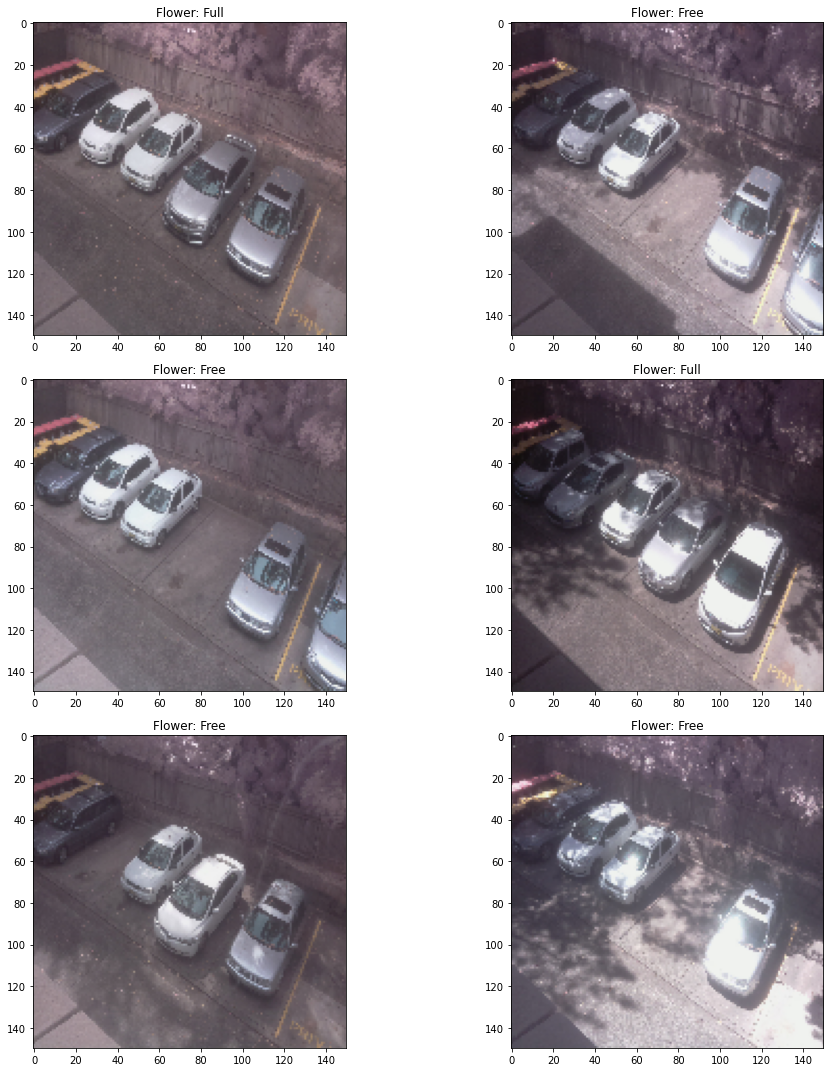

In [7]:
# check some image
fig,ax=plt.subplots(3,2)
fig.set_size_inches(15,15)
for i in range(3):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()

### Label encoding of the target:
'Free' = 1

'Full' = 0

In [8]:
le=LabelEncoder()
Y=le.fit_transform(Z)
# Y = pd.Series(Z).replace({'Free':1,'Full':0},inplace=True)

### normalization and flatten the images:

In [9]:
X = np.array([cv2.normalize(X[i], None, 0, 255, cv2.NORM_MINMAX) for i in range(len(X))]) # normalization
X=np.array(X)/255
X=np.array([X[i].flatten() for i in range(len(X))]) # flatten the images

In [10]:
df = pd.DataFrame(data=X) # we need this ?
df

,0,1,2,3,4,5,6,7,8,9,...,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
0,0.133333,0.058824,0.062745,0.129412,0.047059,0.062745,0.207843,0.121569,0.168627,0.211765,...,0.403922,0.400000,0.400000,0.490196,0.337255,0.333333,0.403922,0.250980,0.250980,0.290196
1,0.105882,0.062745,0.062745,0.105882,0.058824,0.054902,0.168627,0.121569,0.125490,0.164706,...,0.411765,0.423529,0.427451,0.525490,0.345098,0.349020,0.423529,0.247059,0.250980,0.290196
2,0.129412,0.035294,0.137255,0.129412,0.035294,0.129412,0.184314,0.082353,0.156863,0.176471,...,0.470588,0.458824,0.458824,0.596078,0.352941,0.368627,0.462745,0.247059,0.262745,0.325490
3,0.094118,0.039216,0.101961,0.105882,0.047059,0.117647,0.176471,0.101961,0.156863,0.176471,...,0.474510,0.439216,0.478431,0.592157,0.368627,0.368627,0.474510,0.266667,0.282353,0.349020
4,0.109804,0.039216,0.090196,0.113725,0.043137,0.090196,0.156863,0.078431,0.113725,0.180392,...,0.490196,0.431373,0.474510,0.584314,0.368627,0.396078,0.474510,0.258824,0.278431,0.345098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0.180392,0.164706,0.219608,0.192157,0.168627,0.215686,0.156863,0.137255,0.192157,0.141176,...,0.047059,0.090196,0.101961,0.058824,0.090196,0.101961,0.070588,0.090196,0.101961,0.062745
446,0.160784,0.141176,0.207843,0.164706,0.133333,0.176471,0.105882,0.098039,0.133333,0.156863,...,0.019608,0.074510,0.086275,0.047059,0.105882,0.101961,0.070588,0.094118,0.101961,0.062745
447,0.125490,0.125490,0.156863,0.192157,0.164706,0.180392,0.117647,0.105882,0.125490,0.149020,...,0.062745,0.125490,0.101961,0.058824,0.121569,0.113725,0.074510,0.066667,0.074510,0.039216
448,0.117647,0.113725,0.160784,0.141176,0.133333,0.156863,0.121569,0.121569,0.152941,0.082353,...,0.054902,0.074510,0.082353,0.039216,0.101961,0.101961,0.078431,0.109804,0.101961,0.078431


In [11]:
X.shape

(450, 67500)

### Train-Test Split:

We divide the set into two classes: 66% for training and 33% for testing. 
As we see we have a balancing problem- there much more patients with Non-recurrent than recurrent so we need to take it in account while spliting the data in order to have enough patients with recurrent in the training set but also to have some in the testing. 

(-Change this to our dataset-)

In [12]:
# Maybe put normolize here

In [13]:
# separate data
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

freqs = pd.DataFrame({"Training dataset": [(y_train == 1).sum(),(y_train == 0).sum()],
                      "Test dataset": [(y_test == 1).sum(),(y_test == 0).sum()],
                      "Total": [(y_train == 1).sum()+(y_test == 1).sum(),(y_train == 0).sum()+(y_test == 0).sum()]},
                     index=["Free", "Full"])
freqs[["Training dataset", "Test dataset", "Total"]]

,Training dataset,Test dataset,Total
Free,232,68,300
Full,105,45,150


### Begin building the Logistic-Regression model using tensorflow.v1:

1. Declare the variables that need to be learned and initialization.
   
   The number of variable is the number of the features (X.shape[1], 1)

In [14]:
tf.compat.v1.disable_eager_execution()
W = tf.Variable(tf.zeros(shape=[X.shape[1], 1])) # tf.random_normal maybe better
b = tf.Variable(tf.zeros(shape=[1, 1]))
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

2. Define placeholders

In [15]:
data = tf.placeholder(dtype=tf.float32, shape=[None, X.shape[1]])
target = tf.placeholder(dtype=tf.float32, shape=[None, 1])

3. Declare the model you need to learn

In [16]:
mod = tf.matmul(data, W) + b
# y = 1 / (1.0 + tf.exp(-(tf.matmul(data,W) + b))) # tf.nn.sigmoid(tf.matmul(data,W) + b) maybe better

4. First, we declare the loss function.
    
    Then we use the sigmoid cross-entropy loss function,
    
    meaning, first doing a sigmoid on the model result and then using the cross-entropy loss function.

In [17]:
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=mod, labels=target))

5. Define the requires parameters:
    - learning rate
    - batch_size
    - number of iteration

In [18]:
learning_rate = 0.003
batch_size = 30
iter_num = 1800 # overfitting when it 5000

6. Define the optimizer

In [19]:
opt = tf.train.GradientDescentOptimizer(learning_rate)

7. Define the goal
    
   We want to minimize the loss function using the Gradient-Decent method

In [20]:
goal = opt.minimize(loss)

8. Define the accuracy

In [21]:
# The default threshold is 0.5, rounded off directly
prediction = tf.round(tf.sigmoid(mod))
# Bool into float32 type
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)

### End of the definition of the model framework

In [22]:
# Define the variable that stores the result
loss_trace = []
train_acc = []
test_acc = []

### Start training the  Logistic-Regression model:

In [23]:
for epoch in range(iter_num):
    # Generate random batch index
    batch_index = np.random.choice(len(X_train), size=batch_size)
    batch_train_X = X_train[batch_index]
    batch_train_y = np.matrix(y_train[batch_index]).T
    sess.run(goal, feed_dict={data: batch_train_X, target: batch_train_y})
    temp_loss = sess.run(loss, feed_dict={data: batch_train_X, target: batch_train_y})
    # convert into a matrix, and the shape of the placeholder to correspond
    temp_train_acc = sess.run(accuracy, feed_dict={data: X_train, target: np.matrix(y_train).T})
    temp_test_acc = sess.run(accuracy, feed_dict={data: X_test, target: np.matrix(y_test).T})
    # recode the result
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    # output
    if (epoch + 1) % 300 == 0:
        print('epoch: {:4d} loss: {:5f} train_acc: {:5f} test_acc: {:5f}'.format(epoch + 1, temp_loss,
                                                                          temp_train_acc, temp_test_acc))

epoch:  300 loss: 0.060587 train_acc: 0.994065 test_acc: 0.973451
epoch:  600 loss: 0.041353 train_acc: 0.997033 test_acc: 0.973451
epoch:  900 loss: 0.031643 train_acc: 0.997033 test_acc: 0.982301
epoch: 1200 loss: 0.012225 train_acc: 0.997033 test_acc: 0.964602
epoch: 1500 loss: 0.013266 train_acc: 0.997033 test_acc: 0.973451
epoch: 1800 loss: 0.006053 train_acc: 0.997033 test_acc: 0.973451


### Visualization of the loss function results:

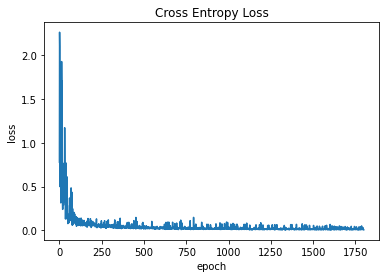

In [24]:
plt.plot(loss_trace)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

We can see that the loss value reduce during the train, there's a graph that shows that.

In [25]:
y_predictions = sess.run(prediction, feed_dict={data: X_test, target: np.matrix(y_test).T})

In [26]:
tf.compat.v1.math.confusion_matrix
confusion = tf.math.confusion_matrix(y_test, y_predictions, num_classes=2, dtype=tf.float32)
# sess = tf.Session()
print(sess.run(confusion))

[[44.  1.]
 [ 2. 66.]]


In [27]:
TP = sess.run(confusion[1, 1])
TN = sess.run(confusion[0, 0])
FP = sess.run(confusion[0, 1])
FN = sess.run(confusion[1, 0])
print('True Positives (TP):',TP)
print('True Negatives (TN):',TN)
print('False Positives (FP):',FP)
print('False Negarives (FN):',FN)
print('Classification Accuracy:',(TP + TN) / float(TP + TN + FP + FN))
precision = TN / float(TN + FP)
print('Precision:',precision)
recall = TP / float(TP + FN)
print('Recall:', recall)
print('f-score:', 2 * precision * recall / (precision + recall))

True Positives (TP): 66.0
True Negatives (TN): 44.0
False Positives (FP): 1.0
False Negarives (FN): 2.0
Classification Accuracy: 0.9734513274336283
Precision: 0.9777777777777777
Recall: 0.9705882352941176
f-score: 0.974169741697417


The results indicate that the model could not recognize a lot of free parking spot because of the recall but when it did the precision was high.

# LogisticRegression using sklearn

In [28]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Function for computing the confusing matrix:

In [29]:
def cm_analysis(y_true, y_pred, labels, figsize=(7,6)):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = '0'
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax, cmap='Blues')
    #plt.savefig(filename)
    plt.show()

In [30]:
pred, counts = np.unique(y_pred, return_counts=True)
dict(zip(pred, counts))

{0: 47, 1: 66}

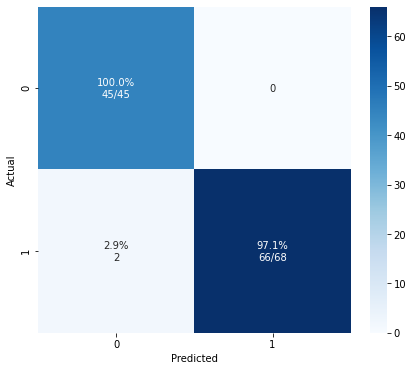

In [31]:
cm_analysis(y_test, y_pred, log_reg.classes_)

In [32]:
metrics.accuracy_score(y_test, y_pred)

0.9823008849557522

In [33]:
print("Accuracy of Logistic Regression (cross-validation): ",cross_val_score(log_reg, X, y, cv=10, scoring='accuracy').mean())

NameError: name 'y' is not defined